# Import Libraries

In [137]:
import gc
import re

import string
import spacy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from datetime import datetime
from collections import Counter
from wordcloud import WordCloud


import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

import gensim

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

sns.set_palette("tab10")
#sns.set_palette("Paired")
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime', 'sample']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Datasets

In [138]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [139]:
encoding_number = 'ISO-8859-1'
columns_name = ['target', 'ids', 'date', 'flag', 'user', 'tweet']

path = '/content/drive/My Drive/Capstone Project/training.1600000.processed.noemoticon.csv'
df_0 = pd.read_csv(path, encoding = encoding_number, names = columns_name)

In [140]:
df_0.head()

,target,ids,date,flag,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [141]:
df_0.dtypes

target     int64
ids        int64
date      object
flag      object
user      object
tweet     object
dtype: object

In [142]:
df_0.shape

(1600000, 6)

In [143]:
df_0.tail()


,target,ids,date,flag,user,tweet
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [144]:
# date format is different

In [145]:
df_0.target.unique()

array([0, 4])

In [146]:
df_0.target.nunique()

2

In [147]:
# as there is only two values of target, replace 4 with 1
df_0.target = df_0.target.replace(4,1)

In [148]:
df_0.head()

,target,ids,date,flag,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [149]:
# 0 means negative sentiment, 1 means positive sentiment

In [150]:
df_0['target'].value_counts(normalize = True)

0    0.5
1    0.5
Name: target, dtype: float64

In [151]:
df_0

,target,ids,date,flag,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [152]:
df_0 = df_0.sort_values('target')
df_0.head(4)

,target,ids,date,flag,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
533328,0,2197102502,Tue Jun 16 13:20:43 PDT 2009,NO_QUERY,Papps93,@Barber_21 i've never ever played an instrume...
533329,0,2197102654,Tue Jun 16 13:20:44 PDT 2009,NO_QUERY,LuLu88A,@Fumm Ooo dont say that u
533330,0,2197102915,Tue Jun 16 13:20:45 PDT 2009,NO_QUERY,guytp,Nose filled with ick is no fun


In [153]:
df_0.tail(5)

,target,ids,date,flag,user,tweet
1066668,1,1965353425,Fri May 29 15:46:16 PDT 2009,NO_QUERY,lynnojebe,@stephaniepratt the short orange one!!! Soo pr...
1066669,1,1965353441,Fri May 29 15:46:16 PDT 2009,NO_QUERY,johnnnaa,@jaykpurdy hah varsity fanclub is on a board
1066670,1,1965353448,Fri May 29 15:46:18 PDT 2009,NO_QUERY,karinlinardy,@AndyTheSamurai been there before it's a cool...
1066648,1,1965337069,Fri May 29 15:44:32 PDT 2009,NO_QUERY,caitlinlavergne,Going to pick up Lakin. Leaving Brightside ton...
1599999,1,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


[Text(0, 0, 'Negative'), Text(0, 0, 'Positive')]

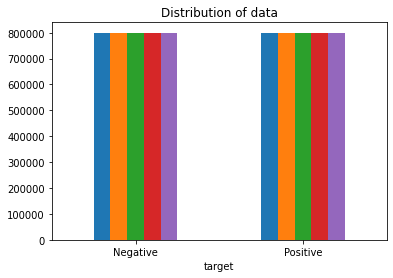

In [154]:
ax = df_0.groupby('target').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

In [155]:
df_1 = df_0[['target', 'tweet']]
df_1 = df_1.sort_values('target')
df_1.head()

,target,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
5,0,@Kwesidei not the whole crew
6,0,Need a hug


In [156]:
df_1.tail()

,target,tweet
1200000,1,danielle is the best thing since cheese in a c...
1599988,1,@Roy_Everitt ha- good job. that's right - we g...
1599976,1,"@mattycus Yeah, my conscience would be clear i..."
1599952,1,#Traveltuesday @GuyNGirlTravels Because their ...
1599999,1,happy #charitytuesday @theNSPCC @SparksCharity...


In [157]:
df_1.shape

(1600000, 2)

In [158]:
df_2= df_1.head(1500)
df_2

,target,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
5,0,@Kwesidei not the whole crew
6,0,Need a hug
...,...,...
1497,0,@kcarruthers I'm only 540 years old in pixie y...
1498,0,body clock still up the chuffer..note never ev...
1489,0,@adreamforsteph ok House was sad.
1499,0,stupid thing wont let me get into my old twitt...


In [159]:
df_3 = df_1.tail(1500)
df_3.head()

,target,tweet
1598504,1,@Arroxane @cherimullins A lot depends on how w...
1598505,1,and now go shopppppppping ROFL!!!!
1598506,1,Project migrated from CVS to SVN. Finally!
1598507,1,Ughh I hate that I wake up so early when I dri...
1598508,1,@jmauricio1 the scandal...the titties on san p...


In [160]:
df = pd.concat([df_2, df_3], axis = 0)

In [161]:
#df['target'].value_counts(normalize = True)
df['target'].value_counts()

0    1500
1    1500
Name: target, dtype: int64

In [162]:
df.shape

(3000, 2)

# Preprocess Text

In [163]:
def change_username(text):
        userPattern       = '@[^\s]+'            #  word behind @name 
        text = re.sub(userPattern, 'user', text)

        urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)" 
        text = re.sub(urlPattern, 'url', text)

        # reduce multiple spaces and newlines to only one
        text = re.sub(r'(\s\s+|\n\n+)', r'\1', text)
         # remove double quotes
        #text = re.sub(r'"', '', text)

        return text


In [164]:
df.sample(10)

,target,tweet
775,0,Yawwwn! Gotta get up early tomorrow who's rea...
1598677,1,paramore finally added taylor as a member
102,0,Behind on my classes for work
799,0,need to sleep. but cant
245,0,@SarahReedSC treaty isn't defined
1599192,1,So close to level 26 on R.C.
361,0,"Geez what a busy afternoon. Meetings, emails, ..."
1394,0,I think im coming down with something.
1455,0,throat is so raw she cannot sleep....
1598619,1,@stevemoakler you were great last night! Thank...


In [165]:
pd.set_option('expand_frame_repr', False)
df['text'] = df['tweet'].apply(change_username)
df.head()

,target,tweet,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","user url - Awww, that's a bummer. You shoulda..."
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....","user no, it's not behaving at all. i'm mad. wh..."
5,0,@Kwesidei not the whole crew,user not the whole crew
6,0,Need a hug,Need a hug


In [166]:
filter = df.text.str.contains('url$|url-|url ', flags = re.IGNORECASE, regex = True, na = False)
df[filter]

,target,tweet,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","user url - Awww, that's a bummer. You shoulda..."
37,0,@MissXu sorry! bed time came here (GMT+1) ht...,user sorry! bed time came here (GMT+1) url
74,0,Why won't you show my location?! http://twit...,Why won't you show my location?! url
50,0,Broadband plan 'a massive broken promise' http...,Broadband plan 'a massive broken promise' url ...
106,0,Emily will be glad when Mommy is done training...,Emily will be glad when Mommy is done training...
...,...,...,...
1599961,1,@crgrs359 Skip the aquarium and check out thes...,user Skip the aquarium and check out these fis...
1599973,1,http://twitpic.com/7jp4n - OMG! Office Space.....,url - OMG! Office Space... I wanna steal it.
1599981,1,Another Commenting Contest! [;: Yay!!! http:/...,Another Commenting Contest! [;: Yay!!! url
1599985,1,"if ur the lead singer in a band, beware fallin...","if ur the lead singer in a band, beware fallin..."


In [167]:
df.isnull().sum()

target    0
tweet     0
text      0
dtype: int64

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 1599999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  3000 non-null   int64 
 1   tweet   3000 non-null   object
 2   text    3000 non-null   object
dtypes: int64(1), object(2)
memory usage: 93.8+ KB


In [169]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'],
                                                    test_size = 0.2, random_state = 42)

In [170]:
save_path = '/content/drive/My Drive/Capstone Project/cleaned_text_3000.csv'
df.to_csv(save_path)

In [171]:
df_v = df

In [172]:
df_v = df_v.replace([0,1], ["Negative","Positive"])

In [173]:
df_v['Length'] = df_v['tweet'].apply(len)
df_v.head()

,target,tweet,text,Length
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","user url - Awww, that's a bummer. You shoulda...",115
3,Negative,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,47
4,Negative,"@nationwideclass no, it's not behaving at all....","user no, it's not behaving at all. i'm mad. wh...",111
5,Negative,@Kwesidei not the whole crew,user not the whole crew,29
6,Negative,Need a hug,Need a hug,11


In [174]:
df_v = df_v.rename(columns = {'tweet': 'Tweet', 'target': 'Sentiment'})

In [175]:
df_v.head()

,Sentiment,Tweet,text,Length
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","user url - Awww, that's a bummer. You shoulda...",115
3,Negative,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,47
4,Negative,"@nationwideclass no, it's not behaving at all....","user no, it's not behaving at all. i'm mad. wh...",111
5,Negative,@Kwesidei not the whole crew,user not the whole crew,29
6,Negative,Need a hug,Need a hug,11


In [176]:
df_v[df_v['Sentiment'] == 'Positive']

,Sentiment,Tweet,text,Length
1598504,Positive,@Arroxane @cherimullins A lot depends on how w...,user user A lot depends on how well you train ...,116
1598505,Positive,and now go shopppppppping ROFL!!!!,and now go shopppppppping ROFL!!!!,35
1598506,Positive,Project migrated from CVS to SVN. Finally!,Project migrated from CVS to SVN. Finally!,43
1598507,Positive,Ughh I hate that I wake up so early when I dri...,Ughh I hate that I wake up so early when I dri...,114
1598508,Positive,@jmauricio1 the scandal...the titties on san p...,user the scandal...the titties on san pedro......,75
...,...,...,...,...
1200000,Positive,danielle is the best thing since cheese in a c...,danielle is the best thing since cheese in a c...,50
1599988,Positive,@Roy_Everitt ha- good job. that's right - we g...,user ha- good job. that's right - we gotta thr...,125
1599976,Positive,"@mattycus Yeah, my conscience would be clear i...","user Yeah, my conscience would be clear in tha...",59
1599952,Positive,#Traveltuesday @GuyNGirlTravels Because their ...,#Traveltuesday user Because their tweets are h...,99


In [177]:
df_v.groupby('Sentiment').mean()

,Length
Sentiment,
Negative,74.470667
Positive,73.620000


In [178]:
def facetgridplot(train, var):
    facet = sns.FacetGrid(train, hue="Sentiment", aspect=4)
    facet.map(sns.kdeplot, var, shade= True)
    facet.set(xlim=(0, train[var].max()))
    facet.add_legend()
    #plt.grid(b=None)
    plt.show();

<Figure size 720x432 with 0 Axes>

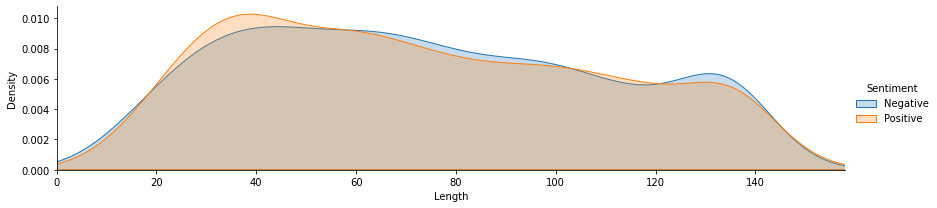

In [179]:
plt.figure(figsize = (10,6))
facetgridplot(df_v, 'Length')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


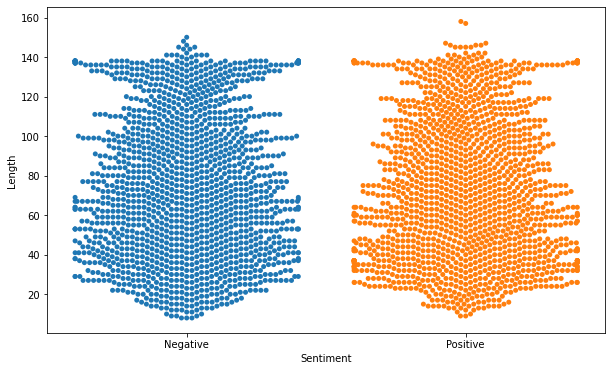

In [180]:
plt.figure(figsize = (10,6))
sns.swarmplot(x = 'Sentiment', y = 'Length', data = df_v)

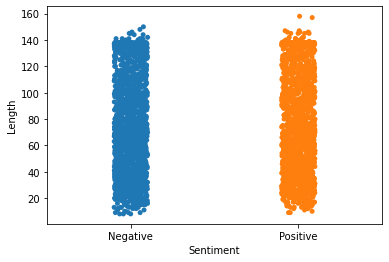

In [181]:
sns.stripplot(x = 'Sentiment', y = 'Length', data = df_v)

In [182]:
data_pos = df_v[df_v['Sentiment'] == 'Positive'].text.tolist()
data_pos[1]

'and now go shopppppppping  ROFL!!!!'

In [183]:
word_list_pos = ' '.join(data_pos).split()
word_list_pos[1]

'user'

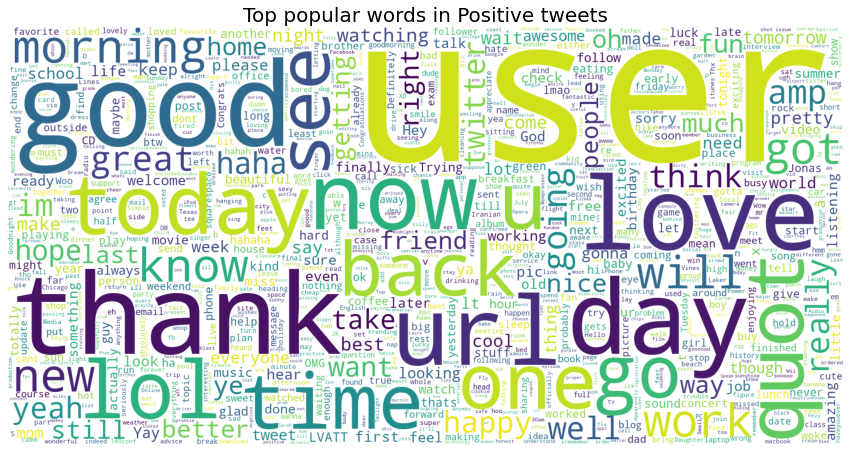

In [184]:
#Positive Sentiment Tweet
wc = WordCloud(background_color = 'white',max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(word_list_pos))
fig = plt.figure(figsize = (15,15))
plt.axis('off')
plt.title('Top popular words in Positive tweets', fontsize=20)
#fig.suptitle('Top popular words in Positive tweets', fontsize=20)
fig.subplots_adjust(top=3)
plt.imshow(wc)
plt.show()

In [185]:
data_neg= df_v[df_v['Sentiment'] == 'Negative'].text.tolist()
data_neg[1]

'my whole body feels itchy and like its on fire '

In [186]:
word_list_neg = ' '.join(data_neg).split()
word_list_neg[1]

'url'

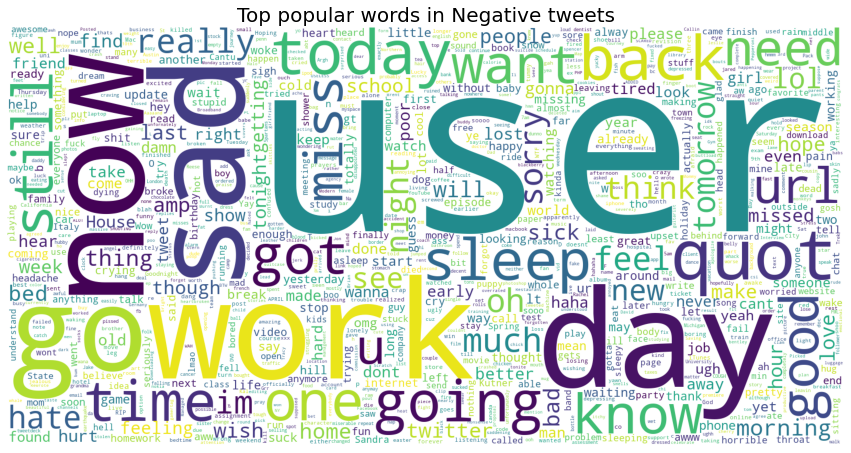

In [187]:
#Negative Sentiment Tweet
wc = WordCloud(background_color = 'white',max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(word_list_neg))
fig = plt.figure(figsize = (15,15))
plt.axis('off')
plt.title('Top popular words in Negative tweets', fontsize=20)
#fig.suptitle('Top popular words in Negative tweets', fontsize=20)
fig.subplots_adjust(top=3)
plt.imshow(wc)
plt.show()

# Feature Engineering

##Count Vectors as features

In [188]:
# Count Vectors as features

# create a count vectorizer object
count_vect = CountVectorizer(token_pattern = r'\w{1,}')

# Learn a vocabulary dictionary of all tokens in the raw documents
count_vect.fit(df['text'])

# Transform documents to document-term matrix.
X_train_count = count_vect.transform(X_train)
X_test_count = count_vect.transform(X_test)

In [189]:
sample = ['This guitar is beautiful', 'I like this guitar']

In [190]:
sample_count_vect = count_vect.transform(sample)

In [191]:
print(sample_count_vect)

  (0, 618)	1
  (0, 2439)	1
  (0, 2892)	1
  (0, 5537)	1
  (1, 2439)	1
  (1, 2754)	1
  (1, 3228)	1
  (1, 5537)	1


##TF-IDF Vectors as features

In [192]:
#TF-IDF Vectors as features
# TF-IDF to allow the important but less often words to gain weights in the meaning.

In [193]:
# Word_level tf-idf

tfidf_vect = TfidfVectorizer(analyzer = 'word',
                             token_pattern = r'\w{1,}',
                             max_features = 5000)
print(tfidf_vect)

tfidf_vect.fit(df['text'])
X_train_tfidf = tfidf_vect.transform(X_train)
X_test_tfidf  = tfidf_vect.transform(X_test)



TfidfVectorizer(max_features=5000, token_pattern='\\w{1,}')


In [194]:
%%time
# ngram level tf-idf
tfidf_vect_ngram = TfidfVectorizer(analyzer = 'word',
                                   token_pattern = r'\w{1,}',
                                   ngram_range = (2, 3),
                                   max_features = 5000)
print(tfidf_vect_ngram)

tfidf_vect_ngram.fit(df['text'])
X_train_tfidf_ngram = tfidf_vect_ngram.transform(X_train)
X_test_tfidf_ngram  = tfidf_vect_ngram.transform(X_test)

TfidfVectorizer(max_features=5000, ngram_range=(2, 3), token_pattern='\\w{1,}')
CPU times: user 372 ms, sys: 2.86 ms, total: 375 ms
Wall time: 372 ms


In [195]:
%%time
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer = 'char',
                                         token_pattern = r'\w{1,}',
                                         ngram_range = (2, 3),
                                         max_features = 5000)
print(tfidf_vect_ngram_chars)

tfidf_vect_ngram_chars.fit(df['text'])
X_train_tfidf_ngram_chars = tfidf_vect_ngram_chars.transform(X_train)
X_test_tfidf_ngram_chars  = tfidf_vect_ngram_chars.transform(X_test)

TfidfVectorizer(analyzer='char', max_features=5000, ngram_range=(2, 3),
                token_pattern='\\w{1,}')


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:547: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  "The parameter 'token_pattern' will not be used"


CPU times: user 570 ms, sys: 6.57 ms, total: 577 ms
Wall time: 573 ms


## Text/NLP based features

In [196]:
# Text/NLP based features
#Create some other features.

#Char_Count = Number of Characters in Text

#Word Count = Number of Words in Text

#Word Density = Average Number of Char in Words

#Punctuation Count = Number of Punctuation in Text

#Title Word Count = Number of Words in Title

#Uppercase Word Count = Number of Upperwords in Text


In [197]:
%%time
df['char_count'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
df['word_density'] = df['char_count'] / (df['word_count'] + 1)
df['punctuation_count'] = df['text'].apply(lambda x: len(''.join(_ for _ in x if _ in string.punctuation))) 
df['title_word_count'] = df['text'].apply(lambda x: len([w for w in x.split() if w.istitle()]))
df['uppercase_word_count'] = df['text'].apply(lambda x: len([w for w in x.split() if w.isupper()]))

CPU times: user 44.1 ms, sys: 4.1 ms, total: 48.2 ms
Wall time: 46.5 ms


In [198]:
df.sample(5)

,target,tweet,text,char_count,word_count,word_density,punctuation_count,title_word_count,uppercase_word_count
1599055,1,@driller33 what...does that even mean fleabo!!?,user what...does that even mean fleabo!!?,42,6,6.000000,6,0,0
826,0,'s Kinda Bummed. An Agency Just Told Me That I...,'s Kinda Bummed. An Agency Just Told Me That I...,137,26,5.074074,9,22,3
1356,0,I hate cooking dinner,I hate cooking dinner,22,4,4.400000,0,1,1
1599954,1,God works mysteriously!i learn that if u think...,God works mysteriously!i learn that if u think...,119,22,5.173913,3,1,0
1598996,1,is going for DEO camp !,is going for DEO camp !,24,6,3.428571,1,0,1


In [199]:
df.shape

(3000, 9)

In [200]:
df.shape[0]

3000

In [201]:
# load spacy  # object-oriented
nlp = spacy.load("en_core_web_sm")

In [202]:
# Initialise some columns for feature's counts
df['adj_count'] = 0
df['adv_count'] = 0
df['noun_count'] = 0
df['num_count'] = 0
df['pron_count'] = 0
df['propn_count'] = 0
df['verb_count'] = 0

In [203]:
len(range(df.shape[0]))

3000

In [204]:
len(range(df.shape[1]))

16

In [205]:
df.shape

(3000, 16)

In [206]:
df.iloc[2]['text']

"user no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. "

In [207]:
nlp(df.iloc[2]['text'])

user no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. 

In [208]:
df['text']= df['text'].astype(str)

In [209]:
%%time
# for each text
for i in range(df.shape[1]):
    # convert into a spaCy document
    doc = nlp(df.iloc[i]['text'])
    # initialise feature counters
    c = Counter([t.pos_ for t in doc])

    df.at[i, 'adj_count'] = c['ADJ']
    df.at[i, 'adv_count'] = c['ADV']
    df.at[i, 'noun_count'] = c['NOUN']
    df.at[i, 'num_count'] = c['NUM']
    df.at[i, 'pron_count'] = c['PRON']
    df.at[i, 'propn_count'] = c['PROPN']
    df.at[i, 'verb_count'] = c['VERB']

CPU times: user 159 ms, sys: 2.87 ms, total: 162 ms
Wall time: 161 ms


In [210]:

df.at[2, 'adj_count']

1

In [211]:
df.shape

(3000, 16)

In [212]:
df.columns

Index(['target', 'tweet', 'text', 'char_count', 'word_count', 'word_density',
       'punctuation_count', 'title_word_count', 'uppercase_word_count',
       'adj_count', 'adv_count', 'noun_count', 'num_count', 'pron_count',
       'propn_count', 'verb_count'],
      dtype='object')

In [213]:
pd.set_option('expand_frame_repr', False) 
df.head(1)

,target,tweet,text,char_count,word_count,word_density,punctuation_count,title_word_count,uppercase_word_count,adj_count,adv_count,noun_count,num_count,pron_count,propn_count,verb_count
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","user url - Awww, that's a bummer. You shoulda...",87,19,4.35,6,7,1,0,0,2,0,3,7,2


In [214]:
df.tail()

,target,tweet,text,char_count,word_count,word_density,punctuation_count,title_word_count,uppercase_word_count,adj_count,adv_count,noun_count,num_count,pron_count,propn_count,verb_count
1200000,1,danielle is the best thing since cheese in a c...,danielle is the best thing since cheese in a c...,50,10,4.545455,1,0,0,0,0,0,0,0,0,0
1599988,1,@Roy_Everitt ha- good job. that's right - we g...,user ha- good job. that's right - we gotta thr...,117,22,5.086957,6,2,3,0,0,0,0,0,0,0
1599976,1,"@mattycus Yeah, my conscience would be clear i...","user Yeah, my conscience would be clear in tha...",54,10,4.909091,2,1,0,0,0,0,0,0,0,0
1599952,1,#Traveltuesday @GuyNGirlTravels Because their ...,#Traveltuesday user Because their tweets are h...,87,12,6.692308,2,2,1,0,0,0,0,0,0,0
1599999,1,happy #charitytuesday @theNSPCC @SparksCharity...,happy #charitytuesday user user user,37,5,6.166667,1,0,0,0,0,0,0,0,0,0


In [215]:
df.shape

(3000, 16)

In [216]:
cols = [
    'char_count',
    'word_count',
    'word_density',
    'punctuation_count',
    'title_word_count',
    'uppercase_word_count',
    'adj_count',
    'adv_count',
    'noun_count',
    'num_count',
    'pron_count',
    'propn_count',
    'verb_count']

df[cols].sample(5)

,char_count,word_count,word_density,punctuation_count,title_word_count,uppercase_word_count,adj_count,adv_count,noun_count,num_count,pron_count,propn_count,verb_count
1599483,35,7,4.375000,0,0,0,0,0,0,0,0,0,0
66,29,5,4.833333,0,1,0,0,0,0,0,0,0,0
1599806,83,20,3.952381,5,4,1,0,0,0,0,0,0,0
1323,73,14,4.866667,2,2,0,0,0,0,0,0,0,0
10,43,7,5.375000,4,0,0,1,0,6,1,1,0,4


In [217]:
df.shape

(3000, 16)

In [218]:
df.tail(5)

,target,tweet,text,char_count,word_count,word_density,punctuation_count,title_word_count,uppercase_word_count,adj_count,adv_count,noun_count,num_count,pron_count,propn_count,verb_count
1200000,1,danielle is the best thing since cheese in a c...,danielle is the best thing since cheese in a c...,50,10,4.545455,1,0,0,0,0,0,0,0,0,0
1599988,1,@Roy_Everitt ha- good job. that's right - we g...,user ha- good job. that's right - we gotta thr...,117,22,5.086957,6,2,3,0,0,0,0,0,0,0
1599976,1,"@mattycus Yeah, my conscience would be clear i...","user Yeah, my conscience would be clear in tha...",54,10,4.909091,2,1,0,0,0,0,0,0,0,0
1599952,1,#Traveltuesday @GuyNGirlTravels Because their ...,#Traveltuesday user Because their tweets are h...,87,12,6.692308,2,2,1,0,0,0,0,0,0,0
1599999,1,happy #charitytuesday @theNSPCC @SparksCharity...,happy #charitytuesday user user user,37,5,6.166667,1,0,0,0,0,0,0,0,0,0


In [219]:
save_path = '/content/drive/My Drive/Capstone Project/text_based_features_3000.csv'

In [220]:
df.to_csv(save_path)

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 1599999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   target                3000 non-null   int64  
 1   tweet                 3000 non-null   object 
 2   text                  3000 non-null   object 
 3   char_count            3000 non-null   int64  
 4   word_count            3000 non-null   int64  
 5   word_density          3000 non-null   float64
 6   punctuation_count     3000 non-null   int64  
 7   title_word_count      3000 non-null   int64  
 8   uppercase_word_count  3000 non-null   int64  
 9   adj_count             3000 non-null   int64  
 10  adv_count             3000 non-null   int64  
 11  noun_count            3000 non-null   int64  
 12  num_count             3000 non-null   int64  
 13  pron_count            3000 non-null   int64  
 14  propn_count           3000 non-null   int64  
 15  verb_count        

In [222]:
df.isnull().sum()

target                  0
tweet                   0
text                    0
char_count              0
word_count              0
word_density            0
punctuation_count       0
title_word_count        0
uppercase_word_count    0
adj_count               0
adv_count               0
noun_count              0
num_count               0
pron_count              0
propn_count             0
verb_count              0
dtype: int64

#Models

In [223]:
## helper function

def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)

    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)

    return accuracy_score(predictions, y_test)

In [224]:
# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Count Vectors',
                                  'WordLevel TF-IDF',
                                  'N-Gram Vectors',
                                  'CharLevel Vectors'])

In [225]:
results

,Count Vectors,WordLevel TF-IDF,N-Gram Vectors,CharLevel Vectors


##Logistic Regression 

In [226]:
%%time
# Linear Classifier on Count Vectors
accuracy_lr1 = train_model(LogisticRegression(solver = 'lbfgs', max_iter = 350), X_train_count, y_train, X_test_count)
print('LR, Count Vectors    : %.4f\n' % accuracy_lr1)

LR, Count Vectors    : 0.7117

CPU times: user 131 ms, sys: 0 ns, total: 131 ms
Wall time: 130 ms


In [227]:
%%time
# Linear Classifier on Word Level TF IDF Vectors
accuracy_lr2 = train_model(LogisticRegression(solver = 'lbfgs', max_iter = 100), X_train_tfidf, y_train, X_test_tfidf)
print('LR, WordLevel TF-IDF : %.4f\n' % accuracy_lr2)

LR, WordLevel TF-IDF : 0.7000

CPU times: user 70.1 ms, sys: 0 ns, total: 70.1 ms
Wall time: 69.3 ms


In [228]:
%%time
# Linear Classifier on Ngram Level TF IDF Vectors
accuracy_lr3 = train_model(LogisticRegression(solver = 'lbfgs', max_iter = 100), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)
print('LR, N-Gram Vectors   : %.4f\n' % accuracy_lr3)

LR, N-Gram Vectors   : 0.6450

CPU times: user 26.9 ms, sys: 24 µs, total: 27 ms
Wall time: 26.6 ms


In [229]:
%%time
# Linear Classifier on Character Level TF IDF Vectors
accuracy_lr4 = train_model(LogisticRegression(solver = 'lbfgs', max_iter = 100), X_train_tfidf_ngram_chars, y_train, X_test_tfidf_ngram_chars)
print('LR, CharLevel Vectors: %.4f\n' % accuracy_lr4)

LR, CharLevel Vectors: 0.6983

CPU times: user 101 ms, sys: 0 ns, total: 101 ms
Wall time: 99.1 ms


In [230]:
results.loc['Logistic Regression'] = {
    'Count Vectors': accuracy_lr1,
    'WordLevel TF-IDF': accuracy_lr2,
    'N-Gram Vectors': accuracy_lr3,
    'CharLevel Vectors': accuracy_lr4}

## Naive Bayes 

In [231]:
%%time
# Naive Bayes on Count Vectors
accuracy_nb1 = train_model(MultinomialNB(), X_train_count, y_train, X_test_count)
print('NB, Count Vectors    : %.4f\n' % accuracy_nb1)

NB, Count Vectors    : 0.7300

CPU times: user 4.77 ms, sys: 999 µs, total: 5.77 ms
Wall time: 5.29 ms


In [232]:
%%time
# Naive Bayes on Word Level TF IDF Vectors
accuracy_nb2 = train_model(MultinomialNB(), X_train_tfidf, y_train, X_test_tfidf)
print('NB, WordLevel TF-IDF : %.4f\n' % accuracy_nb2)

NB, WordLevel TF-IDF : 0.7150

CPU times: user 5.21 ms, sys: 0 ns, total: 5.21 ms
Wall time: 4.52 ms


In [233]:
%%time
# Naive Bayes on Ngram Level TF IDF Vectors
accuracy_nb3 = train_model(MultinomialNB(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)
print('NB, N-Gram Vectors   : %.4f\n' % accuracy_nb3)

NB, N-Gram Vectors   : 0.6583

CPU times: user 4.14 ms, sys: 1.03 ms, total: 5.16 ms
Wall time: 5.19 ms


In [234]:
%%time
# # Naive Bayes on Character Level TF IDF Vectors
accuracy_nb4 = train_model(MultinomialNB(), X_train_tfidf_ngram_chars, y_train, X_test_tfidf_ngram_chars)
print('NB, CharLevel Vectors: %.4f\n' % accuracy_nb4)

NB, CharLevel Vectors: 0.7217

CPU times: user 7.57 ms, sys: 29 µs, total: 7.6 ms
Wall time: 6.89 ms


In [235]:
NB_tfidf_ngram_chars = MultinomialNB()
NB_tfidf_ngram_chars.fit(X_train_tfidf_ngram_chars, y_train)

MultinomialNB()

In [236]:
results.loc['Naïve Bayes'] = {
    'Count Vectors': accuracy_nb1,
    'WordLevel TF-IDF': accuracy_nb2,
    'N-Gram Vectors': accuracy_nb3,
    'CharLevel Vectors': accuracy_nb4}

## Support Vector Machine

In [237]:
%%time
# Support Vector Machine on Count Vectors
accuracy_svm1 = train_model(LinearSVC(), X_train_count, y_train, X_test_count)
print('SVM, Count Vectors    : %.4f\n' % accuracy_svm1)

SVM, Count Vectors    : 0.6900

CPU times: user 31.2 ms, sys: 35 µs, total: 31.2 ms
Wall time: 29.5 ms


In [238]:
%%time
# Support Vector Machine on Word Level TF IDF Vectors
accuracy_svm2 = train_model(LinearSVC(), X_train_tfidf, y_train, X_test_tfidf)
print('SVM, WordLevel TF-IDF : %.4f\n' % accuracy_svm2)

SVM, WordLevel TF-IDF : 0.6967

CPU times: user 12.5 ms, sys: 969 µs, total: 13.4 ms
Wall time: 13 ms


In [239]:
%%time
# Support Vector Machine on Ngram Level TF IDF Vectors
accuracy_svm3 = train_model(LinearSVC(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)
print('SVM, N-Gram Vectors   : %.4f\n' % accuracy_svm3)

SVM, N-Gram Vectors   : 0.6450

CPU times: user 10.7 ms, sys: 1 ms, total: 11.7 ms
Wall time: 11.2 ms


In [240]:
%%time
# Support Vector Machine on Character Level TF IDF Vectors
accuracy_svm4 = train_model(LinearSVC(), X_train_tfidf_ngram_chars, y_train, X_test_tfidf_ngram_chars)
print('SVM, CharLevel Vectors: %.4f\n' % accuracy_svm4)

SVM, CharLevel Vectors: 0.6833

CPU times: user 40.9 ms, sys: 1.02 ms, total: 41.9 ms
Wall time: 40.8 ms


In [241]:
results.loc['Support Vector Machine'] = {
    'Count Vectors': accuracy_svm1,
    'WordLevel TF-IDF': accuracy_svm2,
    'N-Gram Vectors': accuracy_svm3,
    'CharLevel Vectors': accuracy_svm4}

## Random Forest

In [242]:
%%time
# Bagging (Random Forest) on Count Vectors
accuracy_rf1 = train_model(RandomForestClassifier(n_estimators = 100), X_train_count, y_train, X_test_count)
print('RF, Count Vectors    : %.4f\n' % accuracy_rf1)

RF, Count Vectors    : 0.6900

CPU times: user 2.51 s, sys: 3.27 ms, total: 2.52 s
Wall time: 2.49 s


In [243]:
%%time
# Bagging (Random Forest) on Word Level TF IDF Vectors
accuracy_rf2 = train_model(RandomForestClassifier(n_estimators = 100), X_train_tfidf, y_train, X_test_tfidf)
print('RF, WordLevel TF-IDF : %.4f\n' % accuracy_rf2)

RF, WordLevel TF-IDF : 0.7267

CPU times: user 2.19 s, sys: 8.2 ms, total: 2.19 s
Wall time: 2.18 s


In [244]:
%%time
# Bagging (Random Forest) on Ngram Level TF IDF Vectors
accuracy_rf3 = train_model(RandomForestClassifier(n_estimators = 100), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)
print('RF, N-Gram Vectors   : %.4f\n' % accuracy_rf3)

RF, N-Gram Vectors   : 0.6167

CPU times: user 2.28 s, sys: 7.99 ms, total: 2.29 s
Wall time: 2.28 s


In [245]:
%%time 
# characters level tf-idf
# Bagging (Random Forest) on Character Level TF IDF Vectors
accuracy_rf4 = train_model(RandomForestClassifier(n_estimators = 100), X_train_tfidf_ngram_chars, y_train, X_test_tfidf_ngram_chars)
print('RF, CharLevel Vectors: %.4f\n' % accuracy_rf4)

RF, CharLevel Vectors: 0.7017

CPU times: user 2.1 s, sys: 241 µs, total: 2.1 s
Wall time: 2.09 s


In [280]:
rf_tfidf_ngram_chars = RandomForestClassifier(n_estimators = 100)
rf_tfidf_ngram_chars.fit(X_train_tfidf_ngram_chars, y_train)

RandomForestClassifier()

In [246]:
results.loc['Random Forest'] = {
    'Count Vectors': accuracy_rf1,
    'WordLevel TF-IDF': accuracy_rf2,
    'N-Gram Vectors': accuracy_rf3,
    'CharLevel Vectors': accuracy_rf4}

## Gradient Boosting

In [247]:
%%time
# Gradient Boosting on Count Vectors
accuracy_gb1 = train_model(GradientBoostingClassifier(), X_train_count, y_train, X_test_count)
print('GB, Count Vectors    : %.4f\n' % accuracy_gb1)

GB, Count Vectors    : 0.6817

CPU times: user 1.66 s, sys: 4.81 ms, total: 1.67 s
Wall time: 1.66 s


In [248]:
%%time
# Gradient Boosting on Word Level TF IDF Vectors
accuracy_gb2 = train_model(GradientBoostingClassifier(), X_train_tfidf, y_train, X_test_tfidf)
print('GB, WordLevel TF-IDF : %.4f\n' % accuracy_gb2)

GB, WordLevel TF-IDF : 0.6900

CPU times: user 1.78 s, sys: 689 µs, total: 1.78 s
Wall time: 1.77 s


In [249]:
%%time
# Gradient Boosting on Ngram Level TF IDF Vectors
accuracy_gb3 = train_model(GradientBoostingClassifier(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)
print('GB, N-Gram Vectors   : %.4f\n' % accuracy_gb3)

GB, N-Gram Vectors   : 0.6083

CPU times: user 943 ms, sys: 73 µs, total: 943 ms
Wall time: 938 ms


In [250]:
%%time
# Gradient Boosting on Character Level TF IDF Vectors
accuracy_gb4 = train_model(GradientBoostingClassifier(), X_train_tfidf_ngram_chars, y_train, X_test_tfidf_ngram_chars)
print('GB, CharLevel Vectors: %.4f\n' % accuracy_gb4)

GB, CharLevel Vectors: 0.6883

CPU times: user 8.3 s, sys: 11.9 ms, total: 8.31 s
Wall time: 8.25 s


In [251]:
results.loc['Gradient Boosting'] = {
    'Count Vectors': accuracy_gb1,
    'WordLevel TF-IDF': accuracy_gb2,
    'N-Gram Vectors': accuracy_gb3,
    'CharLevel Vectors': accuracy_gb4}

In [252]:
results

,Count Vectors,WordLevel TF-IDF,N-Gram Vectors,CharLevel Vectors
Logistic Regression,0.711667,0.700000,0.645000,0.698333
Naïve Bayes,0.730000,0.715000,0.658333,0.721667
Support Vector Machine,0.690000,0.696667,0.645000,0.683333
Random Forest,0.690000,0.726667,0.616667,0.701667
Gradient Boosting,0.681667,0.690000,0.608333,0.688333


In [253]:
results['average'] = results.iloc[:, 0:3].mean(axis=1)

In [254]:
results

,Count Vectors,WordLevel TF-IDF,N-Gram Vectors,CharLevel Vectors,average
Logistic Regression,0.711667,0.700000,0.645000,0.698333,0.685556
Naïve Bayes,0.730000,0.715000,0.658333,0.721667,0.701111
Support Vector Machine,0.690000,0.696667,0.645000,0.683333,0.677222
Random Forest,0.690000,0.726667,0.616667,0.701667,0.677778
Gradient Boosting,0.681667,0.690000,0.608333,0.688333,0.660000


# Apply Model

In [287]:
test_text = ["Wish you all the best",
            "May the Luck be with you.",
            "I don't feel so good",
             "I love data science",
             "This event is not pleasant",
             "No one likes rainy day",
             "I'd really truly love going out in this weather!"
             ]

In [288]:
pred_sample = pd.DataFrame(test_text, columns = ['test_text'])
pred_sample

,test_text
0,Wish you all the best
1,May the Luck be with you.
2,I don't feel so good
3,I love data science
4,This event is not pleasant
5,No one likes rainy day
6,I'd really truly love going out in this weather!


In [289]:
pred_sample['check'] = pred_sample['test_text'].apply(change_username)

In [290]:
pred_sample

,test_text,check
0,Wish you all the best,Wish you all the best
1,May the Luck be with you.,May the Luck be with you.
2,I don't feel so good,I don't feel so good
3,I love data science,I love data science
4,This event is not pleasant,This event is not pleasant
5,No one likes rainy day,No one likes rainy day
6,I'd really truly love going out in this weather!,I'd really truly love going out in this weather!


In [291]:
#tdidf_check = tfidf_vect_ngram_chars.transform(pred_sample['check'] ) # randome forest
tdidf_check = tfidf_vect_ngram_chars.transform(pred_sample['check'] )
tdidf_check

<7x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 325 stored elements in Compressed Sparse Row format>

In [294]:
#sentiment = rf_tfidf_ngram_chars.predict(tdidf_check)
#sentiment = rf_tfidf_ngram_chars.predict(tdidf_check)
sentiment =  NB_tfidf_ngram_chars.predict(tdidf_check)
sentiment

array([1, 1, 0, 1, 0, 0, 1])

In [295]:
pred_sample['sentiment'] = sentiment .tolist()
pred_sample = pred_sample.replace([0,1], ["Negative","Positive"])
pred_sample

,test_text,check,sentiment
0,Wish you all the best,Wish you all the best,Positive
1,May the Luck be with you.,May the Luck be with you.,Positive
2,I don't feel so good,I don't feel so good,Negative
3,I love data science,I love data science,Positive
4,This event is not pleasant,This event is not pleasant,Negative
5,No one likes rainy day,No one likes rainy day,Negative
6,I'd really truly love going out in this weather!,I'd really truly love going out in this weather!,Positive
